<a href="https://colab.research.google.com/github/Minakshi654/Modelname/blob/main/My_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings
warnings.filterwarnings('ignore')

In [2]:
data2023 = pd.read_csv("/content/CPU_Utilization_2023_Data.csv")
print(data2023.head())
data2024 = pd.read_csv("/content/CPU_Utilization_2024_Data.csv")
print(data2024.head())
df_merged = pd.concat([data2023, data2024], ignore_index=True)
print(df_merged.shape)
print(df_merged.describe())
print(df_merged.info())
df_merged [' total'] = df_merged ['[xBackground__]'] + df_merged ['[xInteractive__]']
print(df_merged.head())


  TimePoints[TimePoint]  [xBackground__]  [xInteractive__]
0   14/04/2023 00:00:00         0.000138               0.0
1   14/04/2023 00:00:30         0.000138               0.0
2   14/04/2023 00:01:00         0.000138               0.0
3   14/04/2023 00:01:30         0.000138               0.0
4   14/04/2023 00:02:00         0.000138               0.0
  TimePoints[TimePoint]  [xBackground__]  [xInteractive__]
0   01/01/2024 00:00:00         0.055115          0.000000
1   01/01/2024 00:00:30         0.055115          0.000039
2   01/01/2024 00:01:00         0.055115          0.000039
3   01/01/2024 00:01:30         0.055115          0.000039
4   01/01/2024 00:02:00         0.055115          0.000039
(973813, 3)
       [xBackground__]  [xInteractive__]
count    973813.000000     973813.000000
mean          0.109621          0.094052
std           0.053882          0.138902
min           0.000000          0.000000
25%           0.077682          0.002500
50%           0.095789          0.

In [3]:
df_merged['TimePoints[TimePoint]'] = pd.to_datetime(df_merged['TimePoints[TimePoint]'], format='%d/%m/%Y %H:%M:%S')
grouped = df_merged.groupby(pd.Grouper(key='TimePoints[TimePoint]', freq='10Min'))[' total'].max()
result_df = pd.DataFrame({
    'Interval Start' : grouped.index,
    'Max Total' : grouped.values
})
result_df.to_csv('grouped_intervals.csv', index=False)
result_df.head()
result_df.shape
result_df['status'] = result_df['Max Total'].apply(lambda x: 'Overflow' if x>1 else 'Normal')
result_df.head()

,Interval Start,Max Total,status
0,2023-04-14 00:00:00,0.000138,Normal
1,2023-04-14 00:10:00,0.000138,Normal
2,2023-04-14 00:20:00,0.051037,Normal
3,2023-04-14 00:30:00,0.042937,Normal
4,2023-04-14 00:40:00,0.031671,Normal


In [4]:
result_df.to_csv('grouped_intervals_with_status.csv', index=False)
num_overflows = (result_df['Max Total'] >= 1)
print(f"Total number of overflows: {num_overflows.sum()}")

Total number of overflows: 593


In [5]:
overflow_columns = result_df[result_df['Max Total'] >= 1]
overflow_columns.to_csv('overflow_columns.csv', index=False)
overflow_columns.head()

,Interval Start,Max Total,status
1488,2023-04-24 08:00:00,1.025500,Overflow
1639,2023-04-25 09:10:00,1.247104,Overflow
2811,2023-05-03 12:30:00,1.011079,Overflow
3501,2023-05-08 07:30:00,1.298292,Overflow
3502,2023-05-08 07:40:00,1.170842,Overflow


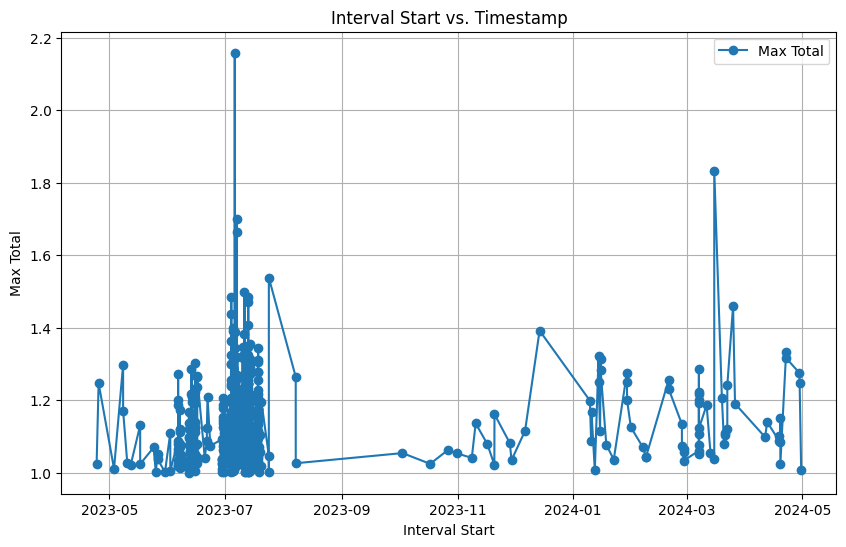

In [6]:
overflow_columns['Interval Start'] = pd.to_datetime(overflow_columns['Interval Start'], format='%Y-%m-%d %H:%M:%S')
plt.figure(figsize=(10, 6))
plt.plot(overflow_columns['Interval Start'], overflow_columns['Max Total'], marker='o', label='Max Total')
plt.xlabel('Interval Start')
plt.ylabel('Max Total')
plt.title('Interval Start vs. Timestamp')
plt.grid(True)
plt.legend()
plt.show()

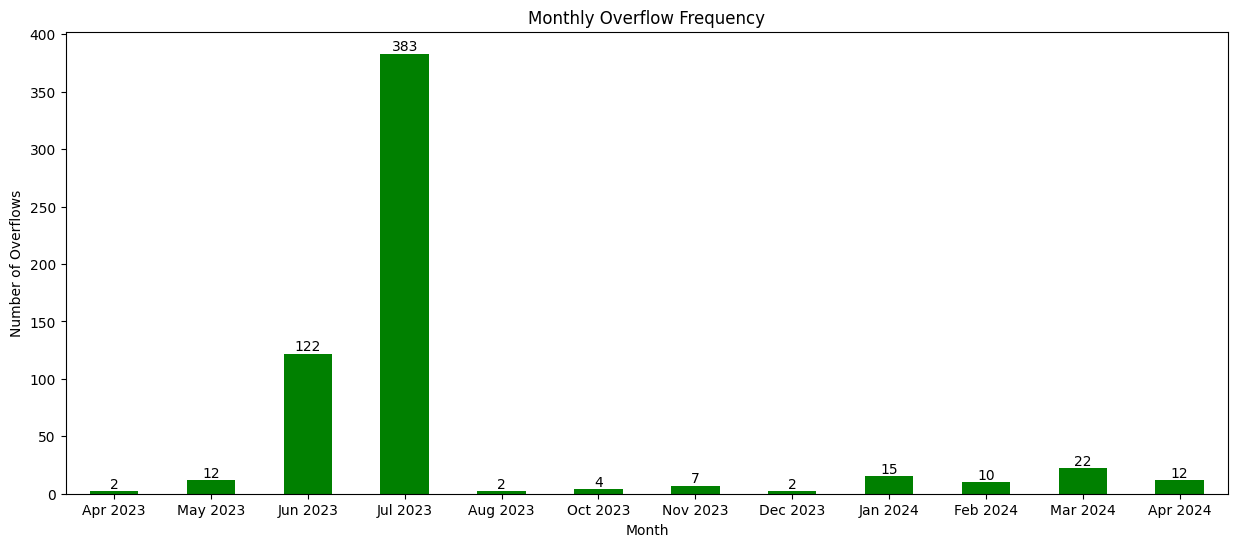

In [7]:

overflow_columns['Interval Start'] = pd.to_datetime(overflow_columns['Interval Start'])
overflow_columns['Year'] = overflow_columns['Interval Start'].dt.year
overflow_columns['Month'] = overflow_columns['Interval Start'].dt.month
df_filtered = overflow_columns[~overflow_columns['Month'].isin([ ])] # Exclude Month
df_filtered = overflow_columns[(overflow_columns['Month'] != 0) | (overflow_columns['Year'] != 2024)] # It will exclude the month and year
Monthly_overflows = df_filtered.groupby(['Year', 'Month']).size()
Month_labels = [calendar.month_abbr[m] + ' ' + str(y) for y,m in Monthly_overflows.index]
plt.figure(figsize=(15, 6))
Monthly_overflows.plot(kind='bar', color='Green') #Graph structure
plt.title('Monthly Overflow Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Overflows')
plt.xticks(range(len(Month_labels)), Month_labels, rotation=0, ha='center') # for bar name like jan 2023, feb 2023, and so on
for i,v in enumerate(Monthly_overflows):                     # For data label
  plt.text(i, v, str(v), ha= 'center', va='bottom')
plt.show()

In [8]:
summary_df = pd.DataFrame(Monthly_overflows, columns=['Number of Overflows'])
summary_df.reset_index(inplace=True)
summary_df['Month Label'] = summary_df.apply(lambda row: calendar.month_abbr[row['Month']] + ' ' + str(row['Year']), axis=1)
print(summary_df[['Month Label', 'Number of Overflows']])

   Month Label  Number of Overflows
0     Apr 2023                    2
1     May 2023                   12
2     Jun 2023                  122
3     Jul 2023                  383
4     Aug 2023                    2
5     Oct 2023                    4
6     Nov 2023                    7
7     Dec 2023                    2
8     Jan 2024                   15
9     Feb 2024                   10
10    Mar 2024                   22
11    Apr 2024                   12


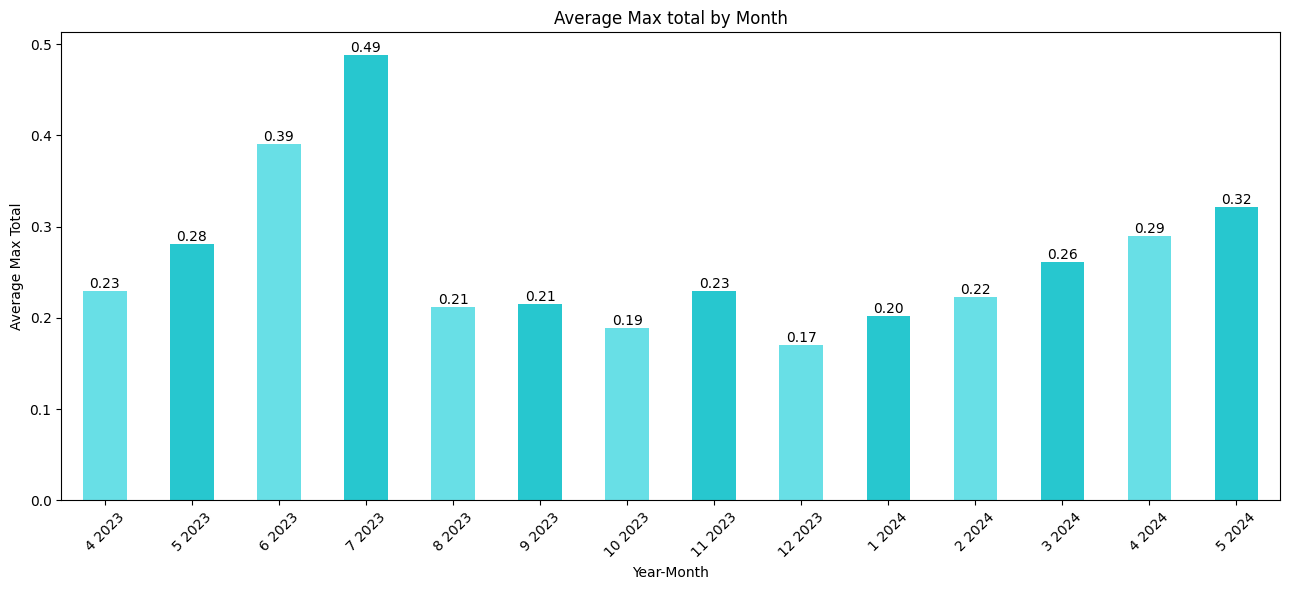

In [9]:
df = pd.read_csv("/content/grouped_intervals.csv")
df['Interval Start'] = pd.to_datetime(df['Interval Start'])
average_max_total = df.groupby([df['Interval Start'].dt.year, df['Interval Start'].dt.month])['Max Total'].mean()
plt.figure(figsize=(13, 6))
average_max_total.plot(kind = 'bar', color= ['#68dfe6', '#27c7cf'], xlabel='Year-Month', ylabel='Average Max Total', title= 'Average Max total by Month')
for i,value in enumerate(average_max_total):
  plt.text(i, value, f'{value:.2f}', ha= 'center', va='bottom')
plt.xticks(range(len(average_max_total)), [f'{month} {year}' for year, month in average_max_total.index], rotation=45, ha='center') # for bar name like jan 2023, feb 2023, and so on
plt.tight_layout()
plt.show()

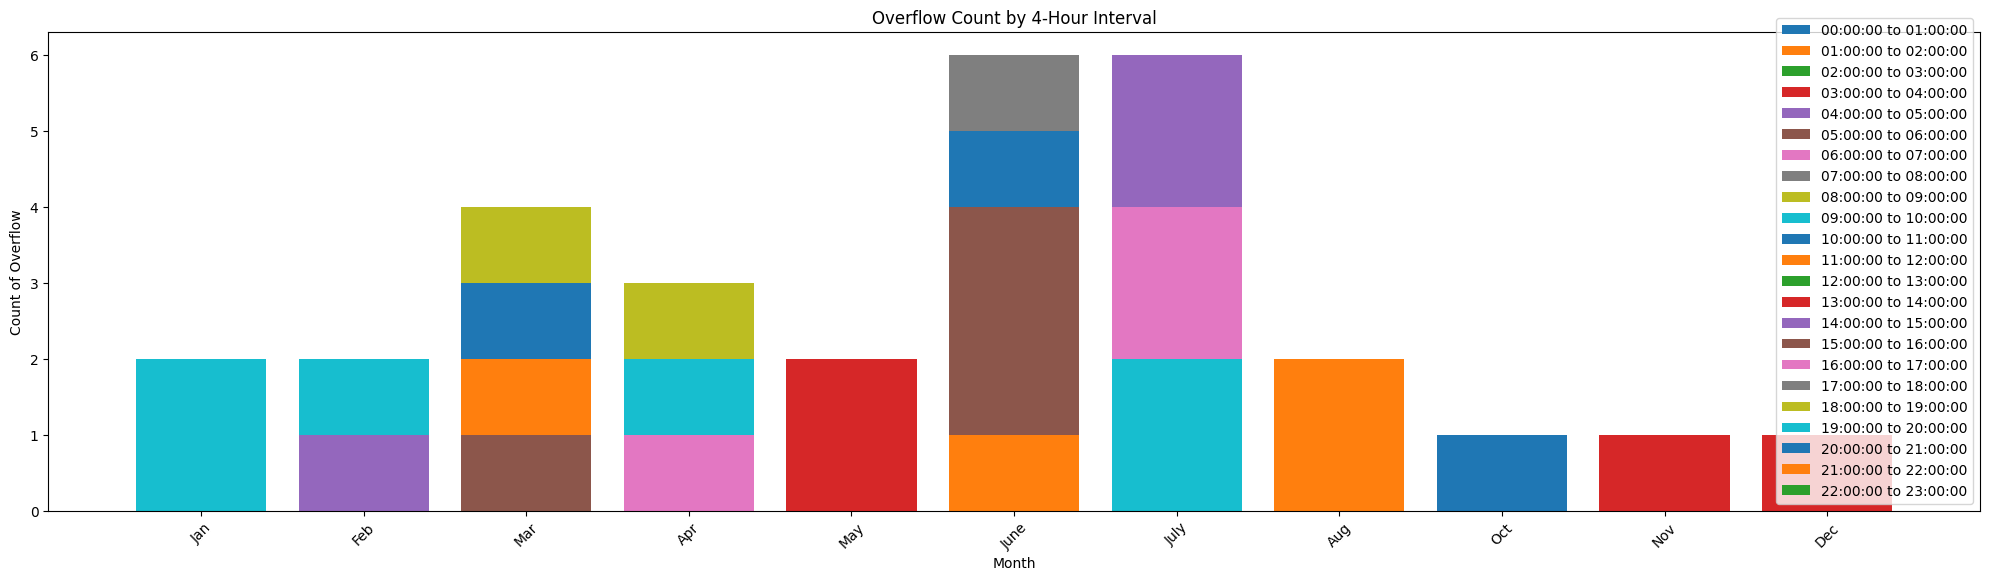

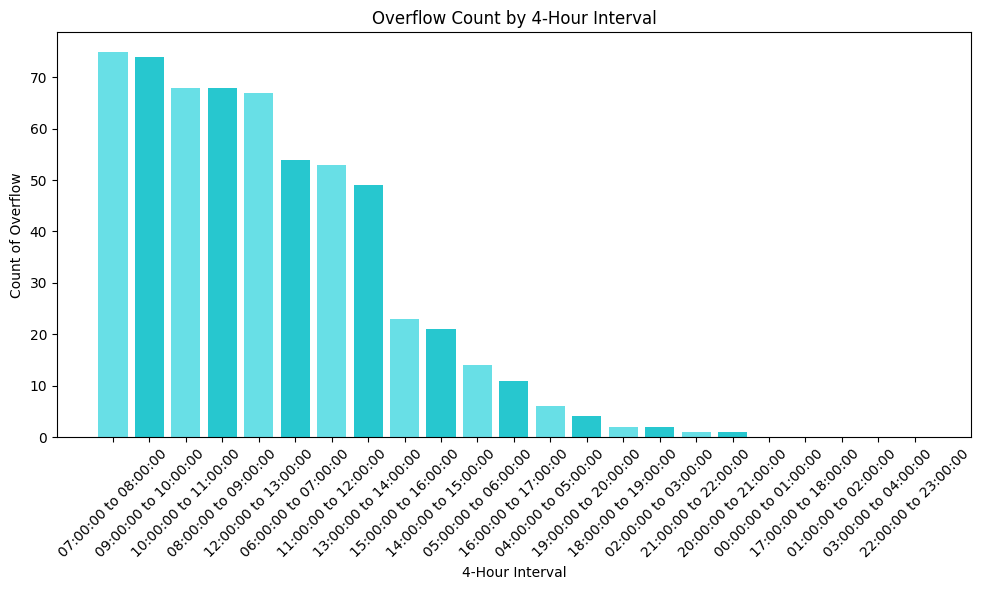

In [10]:

intervals = pd.date_range(start='00:00:00', end='23:59:59', freq='1H').time
interval_labels = [f'{intervals[i]} to {intervals[i+1]}' for i in range(len(intervals)-1)]
df_filtered['time_seconds'] = df_filtered['Interval Start'].dt.hour * 3600 + df_filtered['Interval Start'].dt.minute * 60 + df_filtered['Interval Start'].dt.second
interval_seconds = [t.hour * 3600 + t.minute * 60 + t.second for t in intervals]
df_filtered['4_hour_interval'] = pd.cut(df_filtered['time_seconds'], bins=interval_seconds, labels=interval_labels, right=False)
df_filtered['Count_d'] = df_filtered.groupby('Interval Start')['Interval Start'].transform('size')
df_filtered['Count_m'] = df.groupby([df_filtered['Interval Start'].dt.year, df_filtered['Interval Start'].dt.month])['Interval Start'].transform('size')
df_filtered['Count_y'] = df.groupby(df_filtered['Interval Start'].dt.year)['Interval Start'].transform('size')
df_grouped = df_filtered.groupby([df_filtered['Interval Start'].dt.year,
                                  df_filtered['Interval Start'].dt.month,
                                  df_filtered['Interval Start'].dt.day,
                                  '4_hour_interval']).size().unstack(fill_value=0)
max_overload = df_grouped.groupby([df_grouped.index.get_level_values(0),
                                    df_grouped.index.get_level_values(1)]).max()
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
max_overload['Month'] = max_overload.index.get_level_values(1).map(month_names)
max_overload = max_overload[['Month'] + interval_labels]
plt.figure(figsize=(20,6))
for intervals in interval_labels:
  plt.bar(max_overload['Month'], max_overload[intervals], label=intervals)
plt.xlabel('Month')
plt.ylabel('Count of Overflow')
plt.title('Overflow Count by 4-Hour Interval')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('overflow_count_plot.png')
plt.show()
max_overload.to_csv('summary_table.csv', index=False)

# Create the summary table
summary_table = df_filtered[['Interval Start', '4_hour_interval', 'Count_d', 'Count_m', 'Count_y']].drop_duplicates()

# Save the summary table to another CSV file
summary_table.to_csv('summary_table.csv', index=False)

# Plot the bar graph
plt.figure(figsize=(10, 6))
# Group and count occurrences for each interval
interval_counts = summary_table['4_hour_interval'].value_counts()
plt.bar(interval_counts.index, interval_counts.values, color= ['#68dfe6', '#27c7cf'])
plt.xlabel('4-Hour Interval')
plt.ylabel('Count of Overflow')
plt.title('Overflow Count by 4-Hour Interval')
plt.xticks(rotation=45)
plt.tight_layout()


# Show the plot
plt.show()

In [ ]:
print(max_overload)

4_hour_interval               Month  00:00:00 to 01:00:00  \
Interval Start Interval Start                               
2023           1                Jan                     0   
               2                Feb                     0   
               3                Mar                     0   
               4                Apr                     0   
               5                May                     0   
               6               June                     0   
               7               July                     0   
               8                Aug                     0   
               10               Oct                     0   
               11               Nov                     0   
               12               Dec                     0   
2024           1                Jan                     0   
               2                Feb                     0   
               3                Mar                     0   
               4        

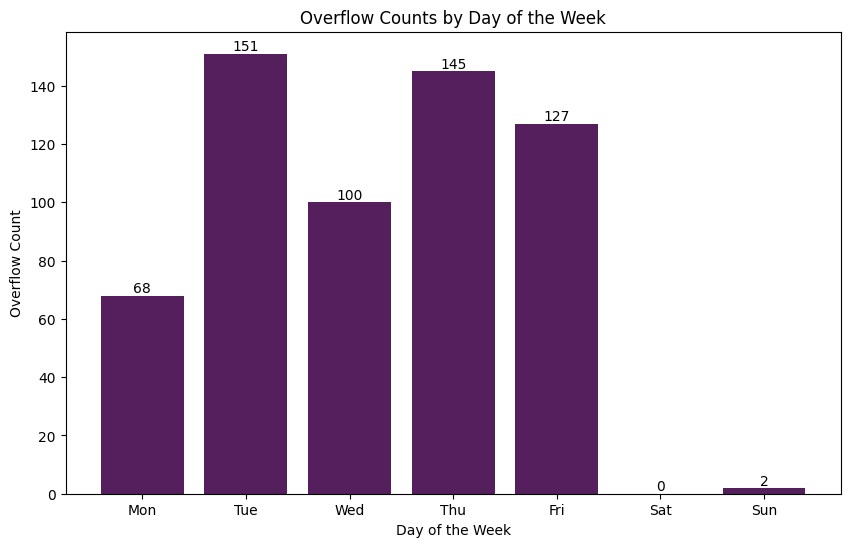

               Day of the Week  Total Overflow Count
Interval Start                                      
0                          Mon                    68
1                          Tue                   151
2                          Wed                   100
3                          Thu                   145
4                          Fri                   127
5                          Sat                     0
6                          Sun                     2


In [11]:
day_counts = summary_table['Interval Start'].dt.dayofweek.value_counts().sort_index()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Reindex day_counts to ensure all days of the week are included
day_counts = day_counts.reindex(range(7), fill_value=0)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(days, day_counts, color= '#551E5D') # Plot using the reindexed day_counts

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Overflow Count')
plt.title('Overflow Counts by Day of the Week')

# Annotate the bar graph with total counts
for i, count in enumerate(day_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

# Create a table to display the counts
day_counts_df = pd.DataFrame({'Day of the Week': days, 'Total Overflow Count': day_counts})
print(day_counts_df)

Enter the year (or 0 to show all): 0
Enter the month (1-12, or 0 to show all): 0


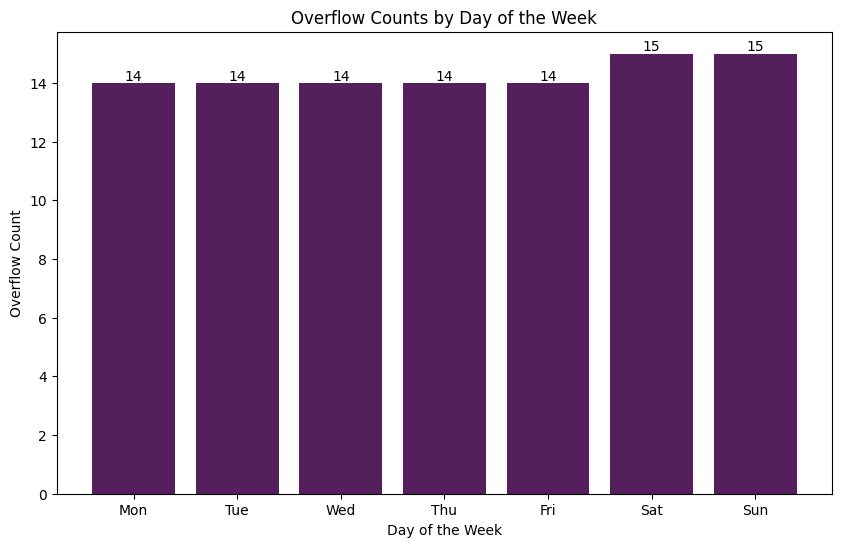

               Day of the Week  Total Overflow Count
Interval Start                                      
0                          Mon                    14
1                          Tue                    14
2                          Wed                    14
3                          Thu                    14
4                          Fri                    14
5                          Sat                    15
6                          Sun                    15


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for demonstration
data = {
    'Interval Start': pd.date_range(start='1/1/2022', periods=100, freq='D')
}
summary_table = pd.DataFrame(data)

# Ask for year and month
year = int(input("Enter the year (or 0 to show all): "))
month = int(input("Enter the month (1-12, or 0 to show all): "))

# Extract year and month from 'Interval Start'
summary_table['Year'] = summary_table['Interval Start'].dt.year
summary_table['Month'] = summary_table['Interval Start'].dt.month

# Filter data based on year and month
if year != 0:
    summary_table = summary_table[summary_table['Year'] == year]
if month != 0:
    summary_table = summary_table[summary_table['Month'] == month]

# Calculate day counts
day_counts = summary_table['Interval Start'].dt.dayofweek.value_counts().sort_index()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Reindex day_counts to ensure all days of the week are included
day_counts = day_counts.reindex(range(7), fill_value=0)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(days, day_counts, color='#551E5D')  # Plot using the reindexed day_counts

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Overflow Count')
plt.title('Overflow Counts by Day of the Week')

# Annotate the bar graph with total counts
for i, count in enumerate(day_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

# Create a table to display the counts
day_counts_df = pd.DataFrame({'Day of the Week': days, 'Total Overflow Count': day_counts})
print(day_counts_df)


Enter the year (or 0 to show all): 0
Enter the month (1-12, or 0 to show all): 0


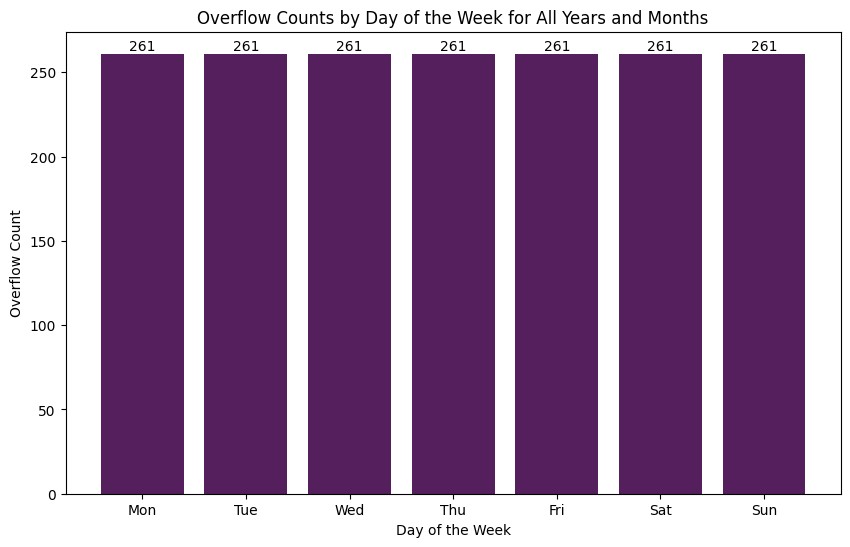

               Day of the Week  Total Overflow Count
Interval Start                                      
0                          Mon                   261
1                          Tue                   261
2                          Wed                   261
3                          Thu                   261
4                          Fri                   261
5                          Sat                   261
6                          Sun                   261


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for demonstration
data = {
    'Interval Start': pd.date_range(start='2020-01-01', end='2024-12-31', freq='D')
}
summary_table = pd.DataFrame(data)

# Ask for year and month
year = int(input("Enter the year (or 0 to show all): "))
month = int(input("Enter the month (1-12, or 0 to show all): "))

# Extract year and month from 'Interval Start'
summary_table['Year'] = summary_table['Interval Start'].dt.year
summary_table['Month'] = summary_table['Interval Start'].dt.month

# Filter data based on year and month
if year != 0:
    summary_table = summary_table[summary_table['Year'] == year]
if month != 0:
    summary_table = summary_table[summary_table['Month'] == month]

# Calculate day counts
day_counts = summary_table['Interval Start'].dt.dayofweek.value_counts().sort_index()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Reindex day_counts to ensure all days of the week are included
day_counts = day_counts.reindex(range(7), fill_value=0)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(days, day_counts, color='#551E5D')  # Plot using the reindexed day_counts

# Add labels and title
if year == 0 and month == 0:
    title = 'Overflow Counts by Day of the Week for All Years and Months'
elif year == 0:
    title = f'Overflow Counts by Day of the Week for All Years, Month {month:02d}'
elif month == 0:
    title = f'Overflow Counts by Day of the Week for Year {year}'
else:
    title = f'Overflow Counts by Day of the Week for {year}-{month:02d}'

plt.xlabel('Day of the Week')
plt.ylabel('Overflow Count')
plt.title(title)

# Annotate the bar graph with total counts
for i, count in enumerate(day_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

# Create a table to display the counts
day_counts_df = pd.DataFrame({'Day of the Week': days, 'Total Overflow Count': day_counts})
print(day_counts_df)


Enter the year (or 0 to show all): 0
Enter the month (1-12, or 0 to show all): 0


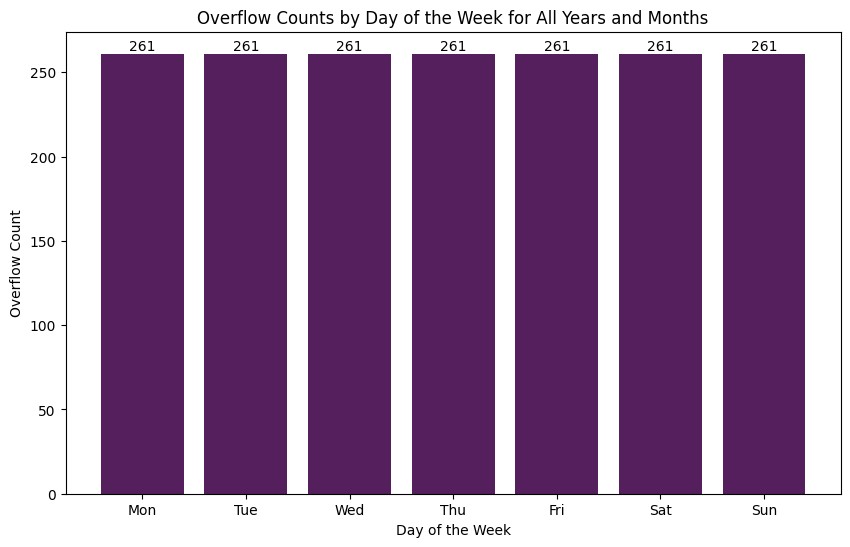

               Day of the Week  Total Overflow Count
Interval Start                                      
0                          Mon                   261
1                          Tue                   261
2                          Wed                   261
3                          Thu                   261
4                          Fri                   261
5                          Sat                   261
6                          Sun                   261


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for demonstration
data = {
    'Interval Start': pd.date_range(start='2020-01-01', end='2024-12-31', freq='D')
}
summary_table = pd.DataFrame(data)

# Ask for year and month
year = int(input("Enter the year (or 0 to show all): "))
month = int(input("Enter the month (1-12, or 0 to show all): "))

# Extract year and month from 'Interval Start'
summary_table['Year'] = summary_table['Interval Start'].dt.year
summary_table['Month'] = summary_table['Interval Start'].dt.month

# Filter data based on year and month
if year != 0:
    summary_table = summary_table[summary_table['Year'] == year]
if month != 0:
    summary_table = summary_table[summary_table['Month'] == month]

# Calculate day counts
day_counts = summary_table['Interval Start'].dt.dayofweek.value_counts().sort_index()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Reindex day_counts to ensure all days of the week are included
day_counts = day_counts.reindex(range(7), fill_value=0)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(days, day_counts, color='#551E5D')  # Plot using the reindexed day_counts

# Add labels and title
if year == 0 and month == 0:
    title = 'Overflow Counts by Day of the Week for All Years and Months'
elif year == 0:
    title = f'Overflow Counts by Day of the Week for All Years, Month {month:02d}'
elif month == 0:
    title = f'Overflow Counts by Day of the Week for Year {year}'
else:
    title = f'Overflow Counts by Day of the Week for {year}-{month:02d}'

plt.xlabel('Day of the Week')
plt.ylabel('Overflow Count')
plt.title(title)

# Annotate the bar graph with total counts
for i, count in enumerate(day_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

# Create a table to display the counts
day_counts_df = pd.DataFrame({'Day of the Week': days, 'Total Overflow Count': day_counts})
print(day_counts_df)


In [22]:
import pandas as pd

# Load the dataset
df = pd.read_csv('overflow_columns.csv')
df['Interval Start'] = pd.to_datetime(df['Interval Start'])
df['Year'] = df['Interval Start'].dt.year
df['Month'] = df['Interval Start'].dt.month
#df['Week'] = df['Interval Start'].dt.isocalendar().week
df['Day'] = df['Interval Start'].dt.day
def week_of_month(dt):
    first_day = dt.replace(day=1)
    dom = dt.day
    adjusted_dom = dom + first_day.weekday()
    return int(adjusted_dom / 7) + 1

df['Week'] = df['Interval Start'].apply(week_of_month)

yearly_counts = df.groupby('Year').size()
print(yearly_counts)
monthly_counts = df.groupby(['Year', 'Month']).size()
print(monthly_counts)
weekly_counts = df.groupby(['Year', 'Month', 'Week']).size()
print(weekly_counts)
daily_counts = df.groupby(['Year', 'Month', 'Day']).size()
print(daily_counts)


Year
2023    534
2024     59
dtype: int64
Year  Month
2023  4          2
      5         12
      6        122
      7        383
      8          2
      10         4
      11         7
      12         2
2024  1         15
      2         10
      3         22
      4         12
dtype: int64
Year  Month  Week
2023  4      5         2
      5      1         1
             2         4
             3         2
             4         4
             5         1
      6      1         2
             2        26
             3        53
             4         5
             5        36
      7      2       178
             3       153
             4        49
             5         3
      8      2         2
      10     2         1
             4         1
             5         1
             6         1
      11     2         2
             3         1
             4         2
             5         2
      12     2         1
             3         1
2024  1      2         4
            

Yearly Counts:
 Year
2023    534
2024     59
dtype: int64
Monthly Counts:
 Year  Month
2023  4          2
      5         12
      6        122
      7        383
      8          2
      10         4
      11         7
      12         2
2024  1         15
      2         10
      3         22
      4         12
dtype: int64
Weekly Counts:
 Year  Month  Week
2023  4      5         2
      5      1         1
             2         4
             3         2
             4         4
             5         1
      6      1         2
             2        26
             3        53
             4         5
             5        36
      7      2       178
             3       153
             4        49
             5         3
      8      2         2
      10     2         1
             4         1
             5         1
             6         1
      11     2         2
             3         1
             4         2
             5         2
      12     2         1
             

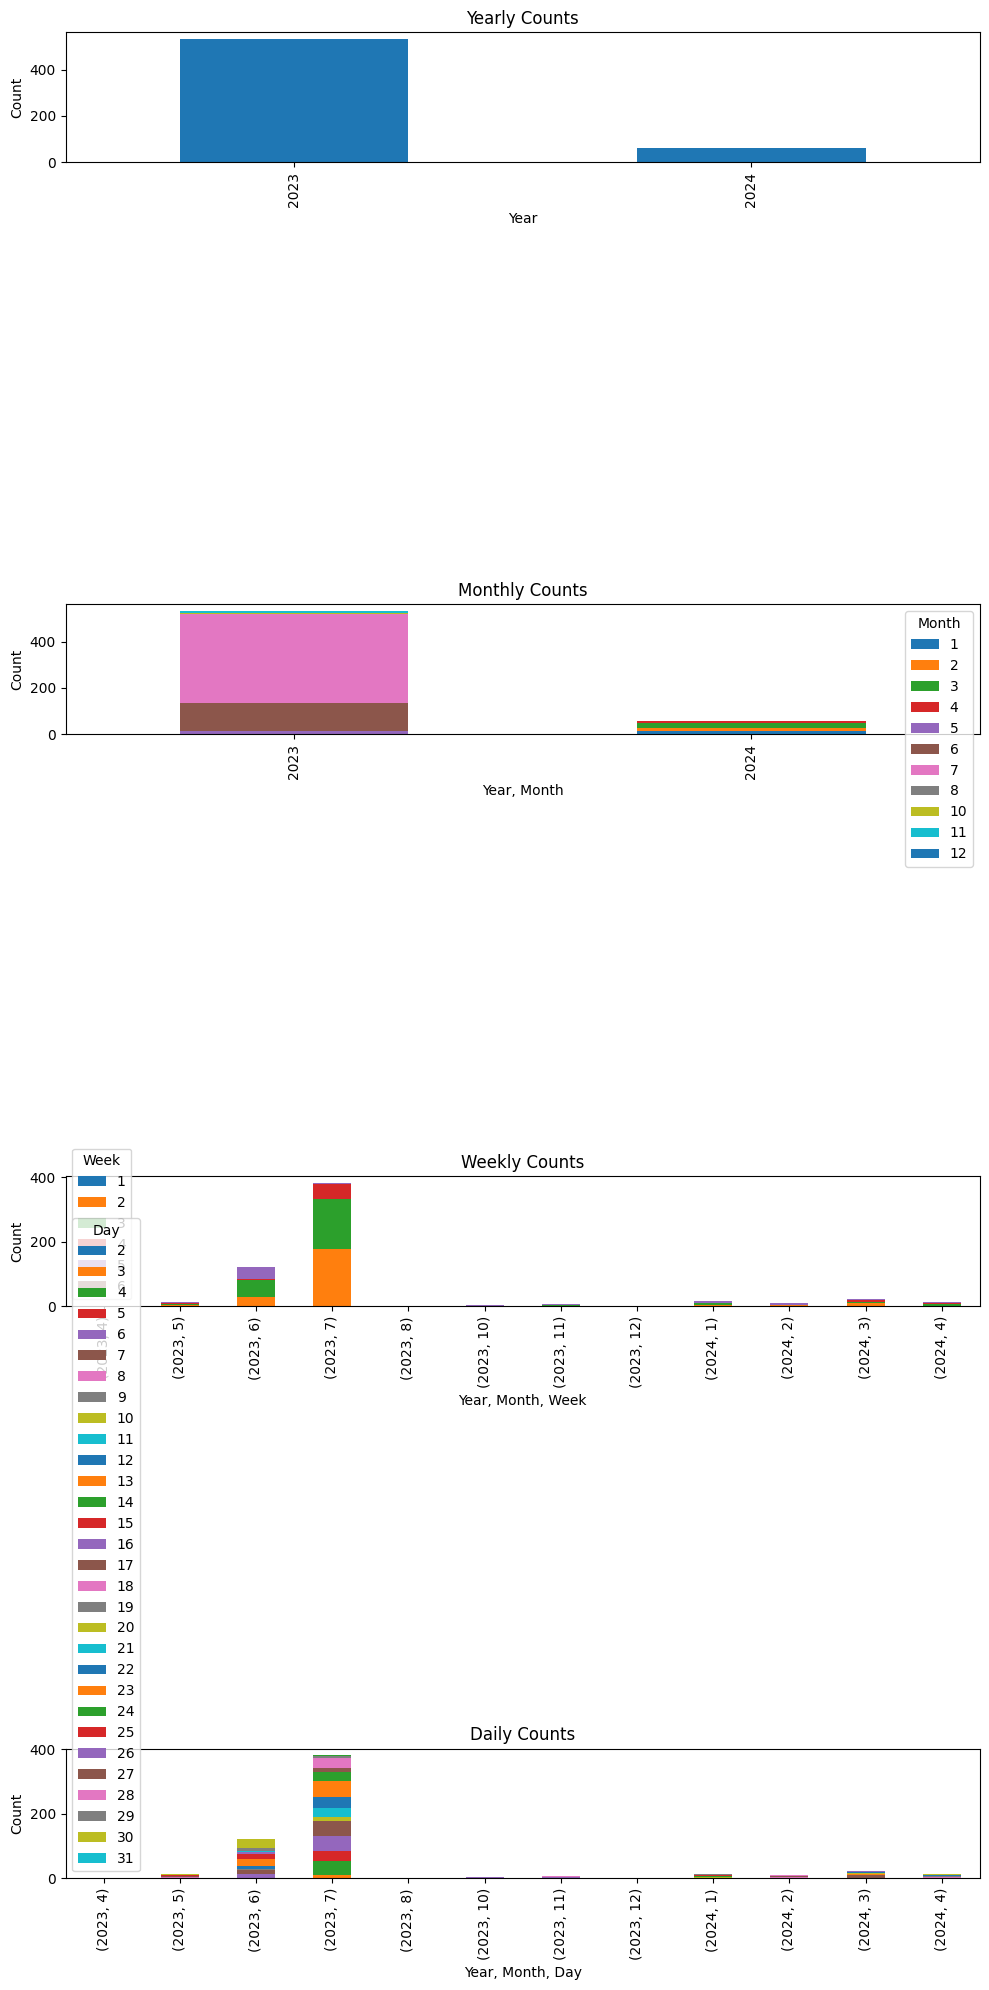

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('overflow_columns.csv')
df['Interval Start'] = pd.to_datetime(df['Interval Start'])
df['Year'] = df['Interval Start'].dt.year
df['Month'] = df['Interval Start'].dt.month
df['Day'] = df['Interval Start'].dt.day

def week_of_month(dt):
    first_day = dt.replace(day=1)
    dom = dt.day
    adjusted_dom = dom + first_day.weekday()
    return int(adjusted_dom / 7) + 1

df['Week'] = df['Interval Start'].apply(week_of_month)

# Group by year, month, week, and day
yearly_counts = df.groupby('Year').size()
monthly_counts = df.groupby(['Year', 'Month']).size()
weekly_counts = df.groupby(['Year', 'Month', 'Week']).size()
daily_counts = df.groupby(['Year', 'Month', 'Day']).size()

# Print the counts
print("Yearly Counts:\n", yearly_counts)
print("Monthly Counts:\n", monthly_counts)
print("Weekly Counts:\n", weekly_counts)
print("Daily Counts:\n", daily_counts)

# Input from user
year = int(input("Enter the year: "))
month = int(input("Enter the month: "))
week = int(input("Enter the week: "))
day = int(input("Enter the day: "))

# Filter data based on user input
filtered_data = df[(df['Year'] == year) & (df['Month'] == month) & (df['Week'] == week) & (df['Day'] == day)]

# Plotting the counts
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# Yearly counts
yearly_counts.plot(kind='bar', ax=axs[0])
axs[0].set_title('Yearly Counts')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Count')

# Monthly counts
monthly_counts.unstack().plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Monthly Counts')
axs[1].set_xlabel('Year, Month')
axs[1].set_ylabel('Count')

# Weekly counts
weekly_counts.unstack().plot(kind='bar', stacked=True, ax=axs[2])
axs[2].set_title('Weekly Counts')
axs[2].set_xlabel('Year, Month, Week')
axs[2].set_ylabel('Count')

# Daily counts
daily_counts.unstack().plot(kind='bar', stacked=True, ax=axs[3])
axs[3].set_title('Daily Counts')
axs[3].set_xlabel('Year, Month, Day')
axs[3].set_ylabel('Count')

plt.tight_layout()
plt.show()


Enter the year: 2023
Overflow count for the year 2023: 534
Enter the month: 7
Overflow count for 2023-7: 383
Enter the week: 3
Overflow count for 2023-7, Week 3: 153
Enter the day: 7
Overflow count for 2023-7-7: 46


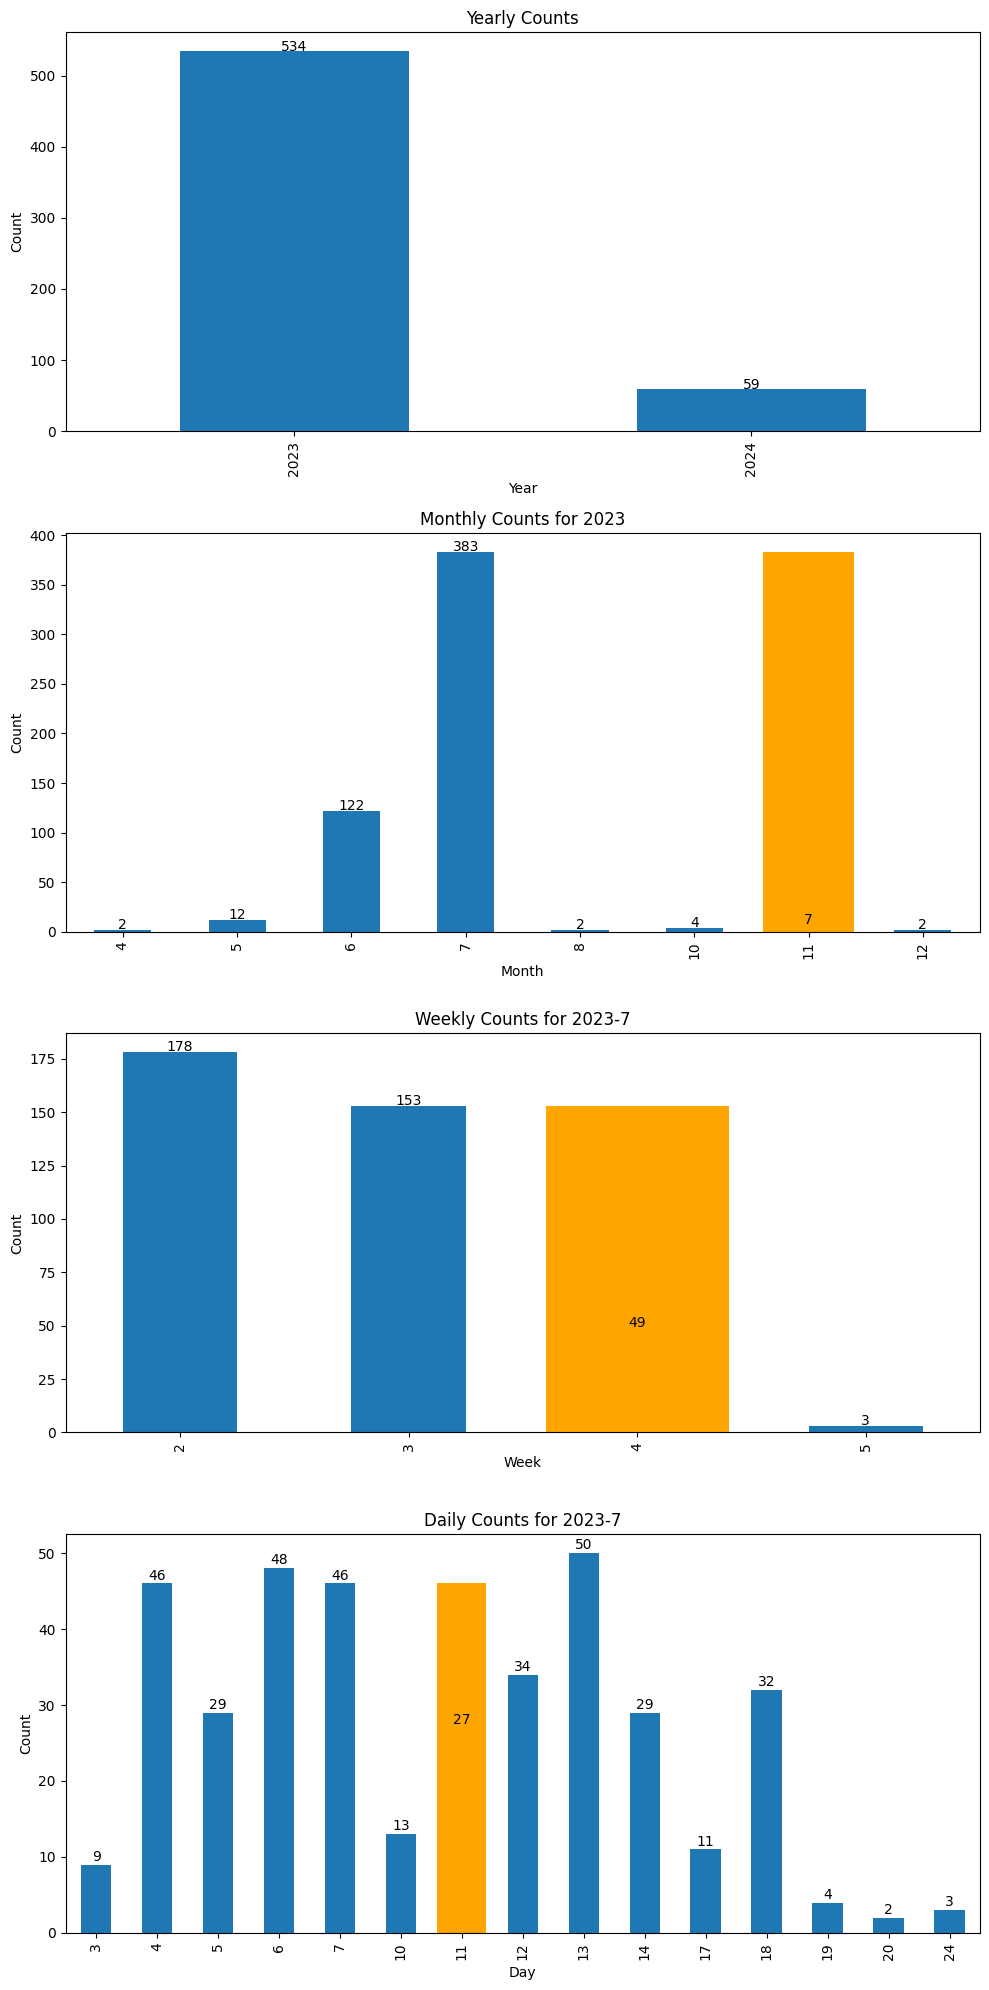

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('overflow_columns.csv')
df['Interval Start'] = pd.to_datetime(df['Interval Start'])
df['Year'] = df['Interval Start'].dt.year
df['Month'] = df['Interval Start'].dt.month
df['Day'] = df['Interval Start'].dt.day

def week_of_month(dt):
    first_day = dt.replace(day=1)
    dom = dt.day
    adjusted_dom = dom + first_day.weekday()
    return int(adjusted_dom / 7) + 1

df['Week'] = df['Interval Start'].apply(week_of_month)

# Group by year, month, week, and day
yearly_counts = df.groupby('Year').size()
monthly_counts = df.groupby(['Year', 'Month']).size()
weekly_counts = df.groupby(['Year', 'Month', 'Week']).size()
daily_counts = df.groupby(['Year', 'Month', 'Day']).size()

# Input from user
year = int(input("Enter the year: "))
print(f"Overflow count for the year {year}: {yearly_counts[year]}")

# Plot yearly counts
fig, axs = plt.subplots(4, 1, figsize=(10, 20))
yearly_counts.plot(kind='bar', ax=axs[0])
axs[0].set_title('Yearly Counts')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Count')
for i, v in enumerate(yearly_counts):
    axs[0].text(i, v + 0.5, str(v), ha='center')

# Input for month
month = int(input("Enter the month: "))
print(f"Overflow count for {year}-{month}: {monthly_counts[year, month]}")

# Plot monthly counts
monthly_counts[year].plot(kind='bar', ax=axs[1])
axs[1].set_title(f'Monthly Counts for {year}')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Count')
for i, v in enumerate(monthly_counts[year]):
    axs[1].text(i, v + 0.5, str(v), ha='center')
axs[1].bar(month - 1, monthly_counts[year, month], color='orange')

# Input for week
week = int(input("Enter the week: "))
print(f"Overflow count for {year}-{month}, Week {week}: {weekly_counts[year, month, week]}")

# Plot weekly counts
weekly_counts[year, month].plot(kind='bar', ax=axs[2])
axs[2].set_title(f'Weekly Counts for {year}-{month}')
axs[2].set_xlabel('Week')
axs[2].set_ylabel('Count')
for i, v in enumerate(weekly_counts[year, month]):
    axs[2].text(i, v + 0.5, str(v), ha='center')
axs[2].bar(week - 1, weekly_counts[year, month, week], color='orange')

# Input for day
day = int(input("Enter the day: "))
print(f"Overflow count for {year}-{month}-{day}: {daily_counts[year, month, day]}")

# Plot daily counts
daily_counts[year, month].plot(kind='bar', ax=axs[3])
axs[3].set_title(f'Daily Counts for {year}-{month}')
axs[3].set_xlabel('Day')
axs[3].set_ylabel('Count')
for i, v in enumerate(daily_counts[year, month]):
    axs[3].text(i, v + 0.5, str(v), ha='center')
axs[3].bar(day - 1, daily_counts[year, month, day], color='orange')

plt.tight_layout()
plt.show()
